In [2]:
import cv2
import pytesseract
import matplotlib
from matplotlib import pyplot as plt

In [3]:
path1="../input/newones/H6.PNG"
path2="../input/excellent/Ac.PNG" 
path3="../input/excellent1/LA.PNG" 
path4="../input/excellent1/PO.PNG"
path5="../input/newones/He1.PNG"  
path6="../input/newones/He2.PNG"
path7="../input/newones/He5.PNG"

path=[path1,path2,path3, path4, path5, path6, path7]

In [6]:
#Image Text Extraction

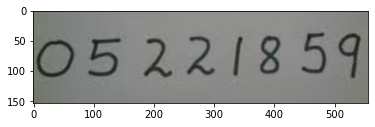

m5 221854


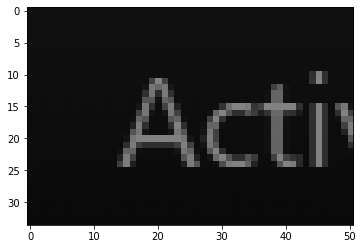

Acti


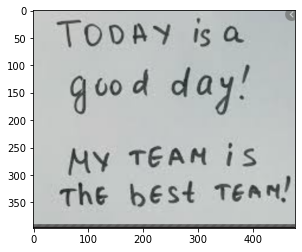

TODAY isa
good day!
MY TEAN iS
The best TEan!


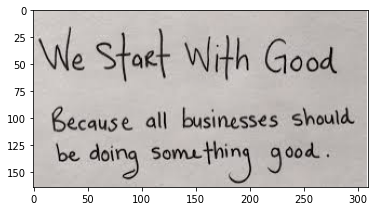

\We Staet With Good
Gecause all businesses should
be aoe sort geod.


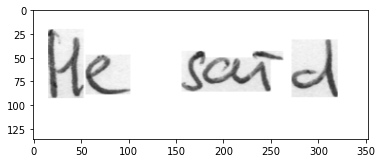

He sara


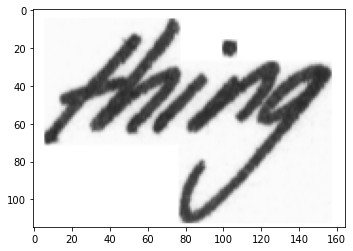

tig


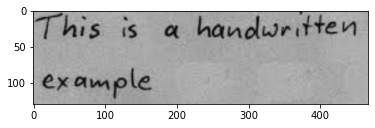

This is a handwritten
example


In [15]:
%matplotlib inline
for i in range(7):
    img=cv2.imread(path[i])
    plt.imshow(img)
    plt.show()
    m=pytesseract.image_to_string(img, config="--oem 3 --psm 6")
    print(m)


In [ ]:
#"""
#import matplotlib.image as mpimg
##for img in os.listdir("/content/train"): 
#image = mpimg.imread(path2)
#plt.imshow(image)
#plt.show()
#"""

In [ ]:
#Image Textual Recognition

In [16]:
def bounding_boxes(path):
    %matplotlib inline
    #for i in range(1,11):
    img=cv2.imread(path)
    plt.imshow(img)
    plt.show()

    h, w, c = img.shape
    boxes = pytesseract.image_to_boxes(img)
    for b in boxes.splitlines():
        b = b.split(' ')
        img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)
    #creates bounding boxes
    plt.imshow(img)
    plt.show()
    from pytesseract import Output
    d = pytesseract.image_to_data(img, output_type=Output.DICT)
    print(d.keys())
    n_boxes = len(d['text'])
    for i in range(n_boxes):
        if int(d['conf'][i]) > 60:
            (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
            img = cv2.rectangle(img, (x, y), (x + w, y + h), (255,255, 0), 2)
    plt.imshow(img)
    plt.show()

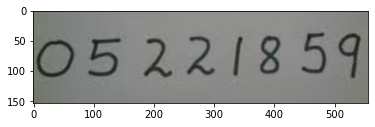

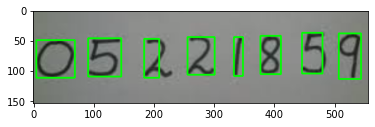

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


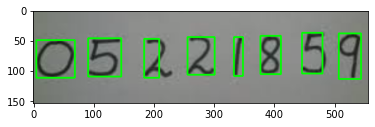

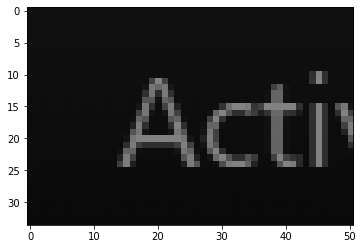

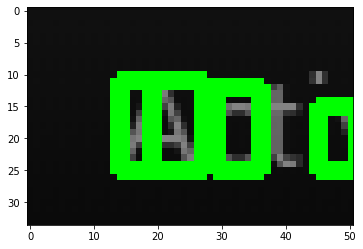

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


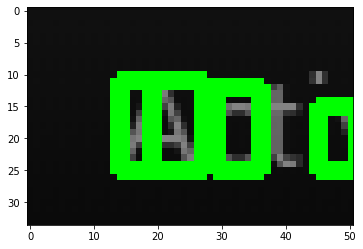

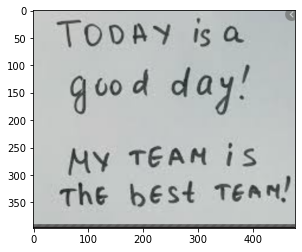

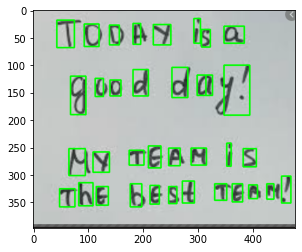

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


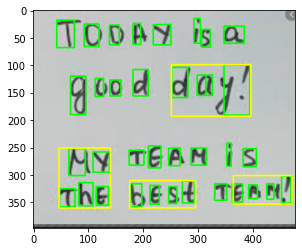

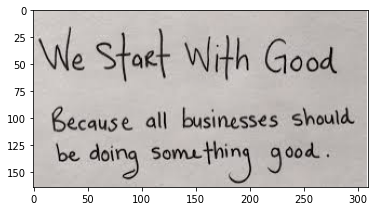

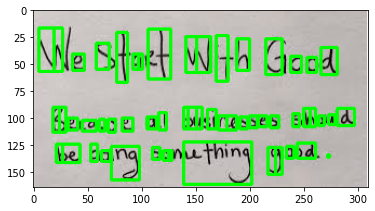

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


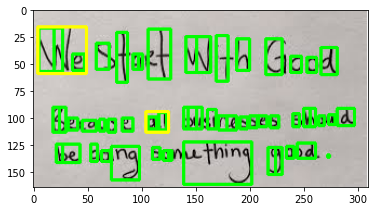

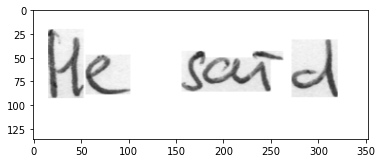

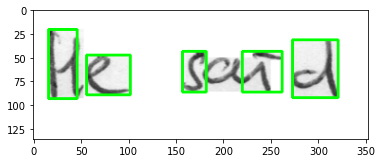

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


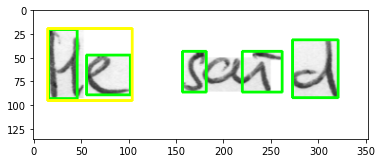

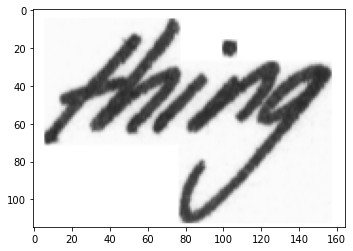

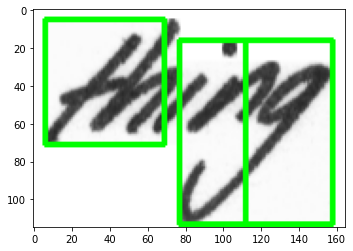

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


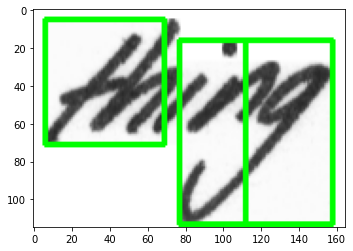

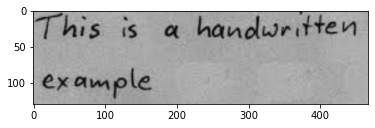

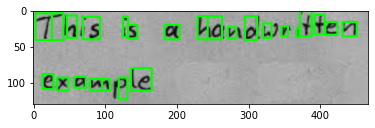

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


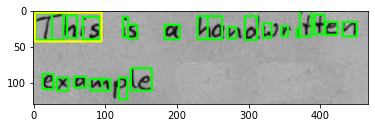

In [17]:
for i in range(7):
    bounding_boxes(path[i])

In [4]:
import numpy as np


In [5]:
#Image PreProcessing

In [5]:
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



In [6]:
# noise removal
def remove_noise(image):
    return cv2.medianBlur(image, 5)


In [7]:

# thresholding
def thresholding(image):
    #img_blur = cv2.medianBlur(self.cropped_img,5).astype('uint8')
    #img_thresh_Gaussian = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    #return im_thresh_Gaussian
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]


In [8]:
# dilation
def dilate(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.dilate(image, kernel, iterations=1)



In [9]:
# erosion
def erode(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.erode(image, kernel, iterations=1)

In [10]:
# opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5, 5), np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)


In [11]:
# canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

In [12]:
# skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


In [13]:

# template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

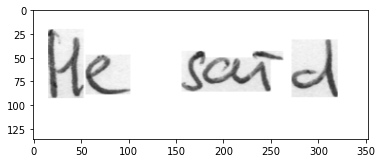

In [19]:
from PIL import Image
#img = cv2.imread('../input/excellent1/PO.PNG')
img = cv2.imread(path5)
plt.imshow(img)

In [20]:


#img2=Image.open('../input/excellent/Ac.PNG')
# Adding custom options
custom_config = r'--oem 3 --psm 6'
print("Main Image\n>"+ pytesseract.image_to_string(img, config=custom_config))
gray = get_grayscale(img)
print("Gray Image\n>"+ pytesseract.image_to_string(gray, config=custom_config))
thresh = thresholding(gray)
print("Thresh Image\n>"+ pytesseract.image_to_string(thresh, config=custom_config))



dilated = dilate(img)
print("Dilated Image\n>"+ pytesseract.image_to_string(dilated, config=custom_config))
eroded = erode(img)
print("Eroded Image\n>"+ pytesseract.image_to_string(eroded, config=custom_config))

Main Image
>He sara
Gray Image
>He sara
Thresh Image
>He sara
Dilated Image
>He sat A
Eroded Image
>He sored


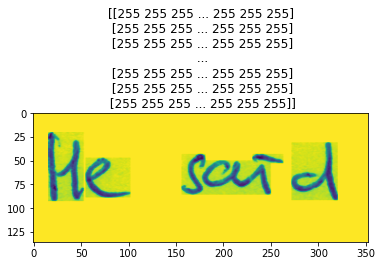

TypeError: Image data of dtype object cannot be converted to float

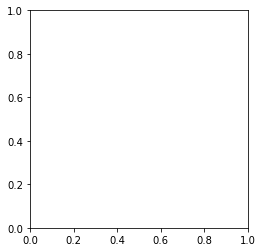

In [21]:
%matplotlib inline
images_list=[gray,opening, thresh,dilated,eroded]
#pytesseract.pytesseract.tesseract_cmd = r'C:\Users\family\AppData\Local\Tesseract-OCR\tesseract.exe'

for i in range(1):
    plt.imshow(images_list[i])
    plt.title(str(images_list[i]))
    plt.show()
